# ResNet 이미지의 카테고리 예측 실험

## 기본 설정

In [ ]:
from google.colab import drive
drive.mount('here')

Mounted at here


In [ ]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False
IS_COLAB_ENV

True

In [ ]:
# There is a version conflict between tensorflow and h5py.
# This combination worked for me.
if IS_COLAB_ENV:
    !pip install tensorflow==2.0.0
!pip install h5py==2.10.0

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

## 모델 생성 및 예측 함수 생성

모델이 이미지를 배치 단위로 받아들이도록 훈련되었으므로 `expand_dims`을 사용해 차원을 하나 더해준다. array의 array로 이미지의 차원을 변경.

In [ ]:
# 모델 생성 함수를 부르면 원격 서버에 있는 모델을 다운받아 로컬 장치에 캐시 저장한다.
model = tf.keras.applications.resnet50.ResNet50()

In [ ]:
def classify(img_path):
    img = image.load_img(img_path, target_size=(224, 224))

    # 모델 생성
    model = tf.keras.applications.resnet50.ResNet50()       

    # 이미지를 array 형태로 변환
    img_array = image.img_to_array(img)                    

    # expand dims.함수를 이용해 배치를 생성 (3 차원에서 >> 4 차원으로)
    img_batch = np.expand_dims(img_array, axis=0)          

    # 자동으로 픽셀값 정규화 해주는 함수
    # 표준 정규화 범위값인 [0,1]나 [-1, 1]로
    img_preprocessed = preprocess_input(img_batch)         

    prediction = model.predict(img_preprocessed)
    
    print(decode_predictions(prediction, top=3)[0])

In [ ]:
import os

PATH = "/content/here/MyDrive/face/C1/"
DIR = os.listdir(PATH)

image_names = []

for f in DIR: 
    if ".jpg" in f:
        image_names.append(f)

image_names.sort()
image_names

['C01.jpg',
 'C02.jpg',
 'C03.jpg',
 'C04.jpg',
 'C05.jpg',
 'C06.jpg',
 'C07.jpg',
 'C08.jpg',
 'C09.jpg',
 'C10.jpg',
 'C11.jpg',
 'C12.jpg',
 'C13.jpg',
 'C14.jpg',
 'C15.jpg',
 'C16.jpg',
 'C17.jpg',
 'C18.jpg',
 'C19.jpg',
 'C20.jpg']

## `target_size`에 맞도록 이미지의 일정 부분만 추출

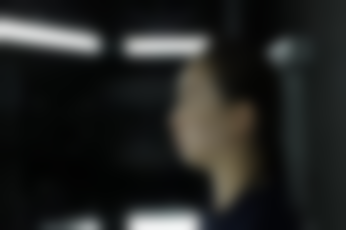

In [ ]:
sample_path = PATH + image_names[0]
sample_image = cv2.imread(sample_path)
sample_image = cv2.GaussianBlur(sample_image, (33,77), cv2.BORDER_DEFAULT)
sample_image = cv2.GaussianBlur(sample_image, (77,57), cv2.BORDER_DEFAULT)
sample_image = cv2.GaussianBlur(sample_image, (77,39), cv2.BORDER_DEFAULT)
cv2_imshow(sample_image)

C01.jpg


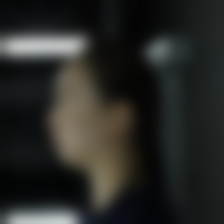

C02.jpg


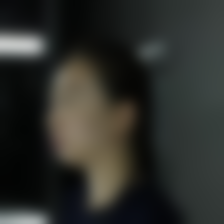

C03.jpg


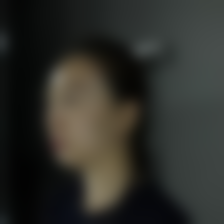

C04.jpg


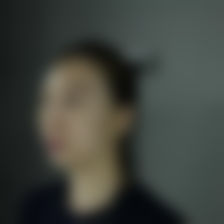

C05.jpg


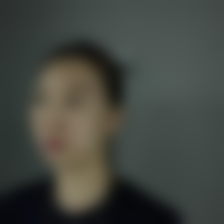

C06.jpg


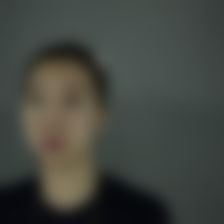

C07.jpg


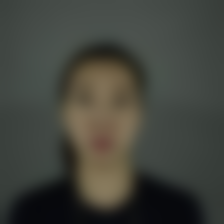

C08.jpg


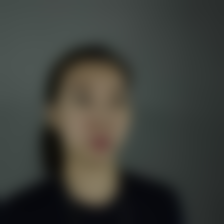

C09.jpg


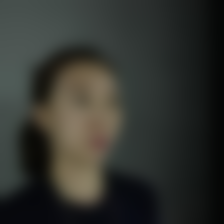

C10.jpg


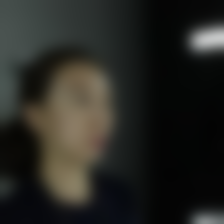

C11.jpg


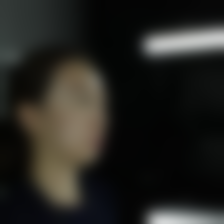

C12.jpg


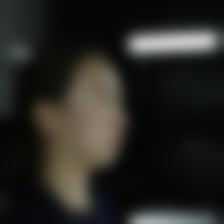

C13.jpg


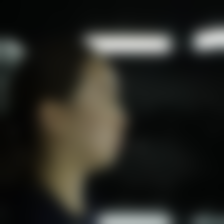

C14.jpg


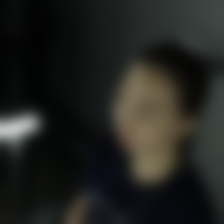

C15.jpg


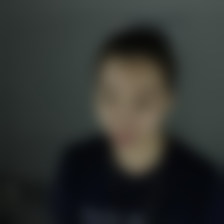

C16.jpg


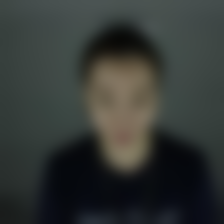

C17.jpg


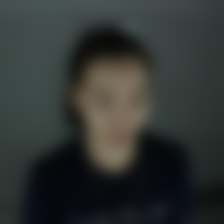

C18.jpg


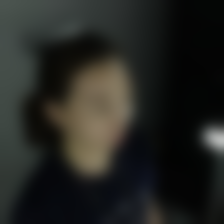

C19.jpg


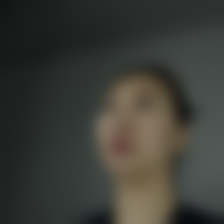

C20.jpg


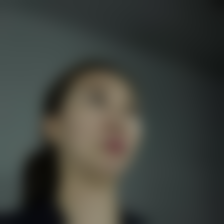

In [ ]:
# from google.colab.patches import cv2_imshow
dir_images = "/content/here/MyDrive/face/C1/"
dir_cropped = "/content/here/MyDrive/face/C1_cropped/"

for i in range(len(image_names)):

    path = dir_images + image_names[i]
    img = cv2.imread(path)

    if (i <= 5):
        img = img[:224, 122:]
    elif (i <= 10):
        img = img[:224, 70:294]
    else:
        img = img[:224, 50:274]

    print(image_names[i])
    cv2.imwrite(dir_cropped + image_names[i], img)

    # 예측 실험에는 원본을 사용했으나 
    # 개인정보 보호를 위해 흐리게 처리
    img = cv2.GaussianBlur(img, (33,77), cv2.BORDER_DEFAULT)
    img = cv2.GaussianBlur(img, (77,57), cv2.BORDER_DEFAULT)
    img = cv2.GaussianBlur(img, (77,39), cv2.BORDER_DEFAULT)

    cv2_imshow(img)


## Test the classifier with test images

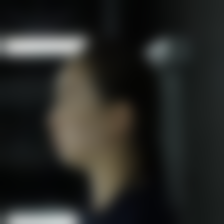

/content/here/MyDrive/face/C1_cropped/C01.jpg (224, 224, 3)
[('n02977058', 'cash_machine', 0.31981716), ('n03255030', 'dumbbell', 0.12914562), ('n04525305', 'vending_machine', 0.053058654)]


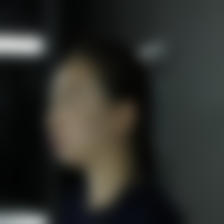

/content/here/MyDrive/face/C1_cropped/C02.jpg (224, 224, 3)
[('n04525305', 'vending_machine', 0.17239842), ('n02977058', 'cash_machine', 0.07202945), ('n03255030', 'dumbbell', 0.066217564)]


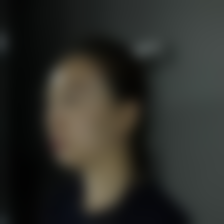

/content/here/MyDrive/face/C1_cropped/C03.jpg (224, 224, 3)
[('n04404412', 'television', 0.23681258), ('n03255030', 'dumbbell', 0.08613103), ('n03759954', 'microphone', 0.067584)]


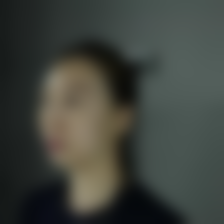

/content/here/MyDrive/face/C1_cropped/C04.jpg (224, 224, 3)
[('n03255030', 'dumbbell', 0.14832257), ('n03595614', 'jersey', 0.12948897), ('n04350905', 'suit', 0.040320348)]


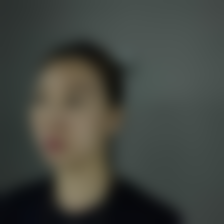

/content/here/MyDrive/face/C1_cropped/C05.jpg (224, 224, 3)
[('n04350905', 'suit', 0.2517589), ('n03759954', 'microphone', 0.083690934), ('n03595614', 'jersey', 0.054669555)]


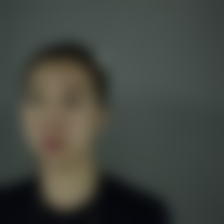

/content/here/MyDrive/face/C1_cropped/C06.jpg (224, 224, 3)
[('n04350905', 'suit', 0.38509586), ('n03759954', 'microphone', 0.08519467), ('n04591157', 'Windsor_tie', 0.043132454)]


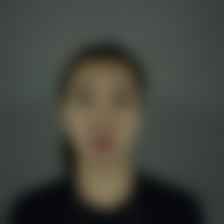

/content/here/MyDrive/face/C1_cropped/C07.jpg (224, 224, 3)
[('n04350905', 'suit', 0.2558861), ('n03759954', 'microphone', 0.11946623), ('n03595614', 'jersey', 0.04818938)]


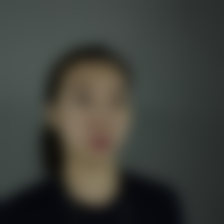

/content/here/MyDrive/face/C1_cropped/C08.jpg (224, 224, 3)
[('n03595614', 'jersey', 0.10706098), ('n04350905', 'suit', 0.09239475), ('n03250847', 'drumstick', 0.07525105)]


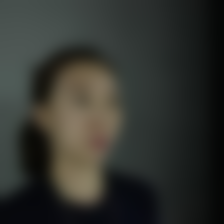

/content/here/MyDrive/face/C1_cropped/C09.jpg (224, 224, 3)
[('n04350905', 'suit', 0.121112175), ('n03595614', 'jersey', 0.056577), ('n03250847', 'drumstick', 0.05175321)]


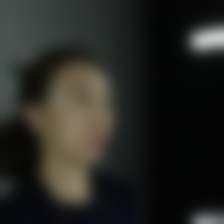

/content/here/MyDrive/face/C1_cropped/C10.jpg (224, 224, 3)
[('n03250847', 'drumstick', 0.13307576), ('n03595614', 'jersey', 0.049573887), ('n03255030', 'dumbbell', 0.04778396)]


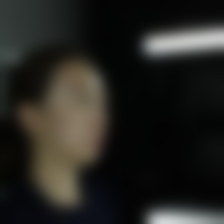

/content/here/MyDrive/face/C1_cropped/C11.jpg (224, 224, 3)
[('n03255030', 'dumbbell', 0.07079655), ('n03250847', 'drumstick', 0.06694112), ('n03759954', 'microphone', 0.04711504)]


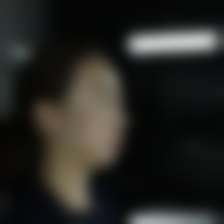

/content/here/MyDrive/face/C1_cropped/C12.jpg (224, 224, 3)
[('n02791270', 'barbershop', 0.07236809), ('n04525305', 'vending_machine', 0.060940538), ('n04404412', 'television', 0.050881077)]


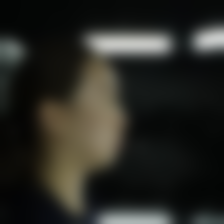

/content/here/MyDrive/face/C1_cropped/C13.jpg (224, 224, 3)
[('n02791270', 'barbershop', 0.1705751), ('n04404412', 'television', 0.14713834), ('n04525305', 'vending_machine', 0.07675769)]


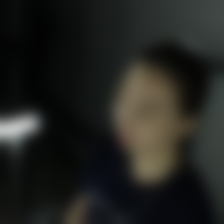

/content/here/MyDrive/face/C1_cropped/C14.jpg (224, 224, 3)
[('n03250847', 'drumstick', 0.12480525), ('n03452741', 'grand_piano', 0.0989572), ('n04515003', 'upright', 0.09443178)]


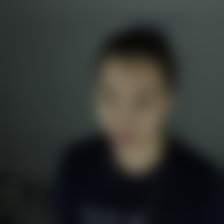

/content/here/MyDrive/face/C1_cropped/C15.jpg (224, 224, 3)
[('n02948072', 'candle', 0.32755756), ('n03970156', 'plunger', 0.06478858), ('n03642806', 'laptop', 0.046547323)]


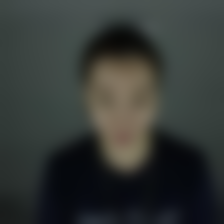

/content/here/MyDrive/face/C1_cropped/C16.jpg (224, 224, 3)
[('n02948072', 'candle', 0.2397406), ('n03642806', 'laptop', 0.093030155), ('n03992509', "potter's_wheel", 0.067398116)]


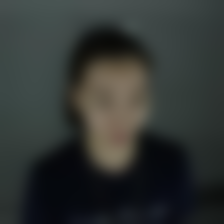

/content/here/MyDrive/face/C1_cropped/C17.jpg (224, 224, 3)
[('n02948072', 'candle', 0.24244271), ('n03970156', 'plunger', 0.091601215), ('n03642806', 'laptop', 0.05941725)]


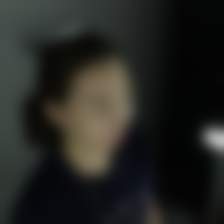

/content/here/MyDrive/face/C1_cropped/C18.jpg (224, 224, 3)
[('n03642806', 'laptop', 0.11792882), ('n02790996', 'barbell', 0.04725586), ('n03832673', 'notebook', 0.031189566)]


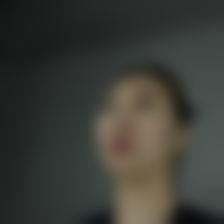

/content/here/MyDrive/face/C1_cropped/C19.jpg (224, 224, 3)
[('n04350905', 'suit', 0.268021), ('n04591157', 'Windsor_tie', 0.06659527), ('n02916936', 'bulletproof_vest', 0.043258887)]


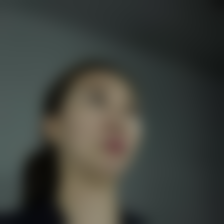

/content/here/MyDrive/face/C1_cropped/C20.jpg (224, 224, 3)
[('n04162706', 'seat_belt', 0.24412626), ('n04350905', 'suit', 0.15954787), ('n03595614', 'jersey', 0.03552275)]


In [ ]:
def classify(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()       

    img_array = image.img_to_array(img)                    
    img_batch = np.expand_dims(img_array, axis=0)          
    img_preprocessed = preprocess_input(img_batch)         

    prediction = model.predict(img_preprocessed)
    prediction = decode_predictions(prediction, top=3)[0]
    
    print(prediction)
    # 예측 내용을 분석하기 위해 데이터를 변수로 반환
    return prediction

preds = []

for i in range(len(image_names)):

    path = dir_cropped + image_names[i]
    img = cv2.imread(path)

    img = cv2.GaussianBlur(img, (33,77), cv2.BORDER_DEFAULT)
    img = cv2.GaussianBlur(img, (77,57), cv2.BORDER_DEFAULT)
    img = cv2.GaussianBlur(img, (77,39), cv2.BORDER_DEFAULT)
    cv2_imshow(img)
    print(path, img.shape)

    pred = classify(path)

    preds.append(pred)

## 예측 결과

In [ ]:
top1s = []
top2s = []
top3s = []

for pred in preds:
    top1s.append(pred[0][1])
    top2s.append(pred[1][1])
    top3s.append(pred[2][1])

print(len(top1s), top1s)
print(len(top2s), top2s)
print(len(top3s), top3s)

20 ['cash_machine', 'vending_machine', 'television', 'dumbbell', 'suit', 'suit', 'suit', 'jersey', 'suit', 'drumstick', 'dumbbell', 'barbershop', 'barbershop', 'drumstick', 'candle', 'candle', 'candle', 'laptop', 'suit', 'seat_belt']
20 ['dumbbell', 'cash_machine', 'dumbbell', 'jersey', 'microphone', 'microphone', 'microphone', 'suit', 'jersey', 'jersey', 'drumstick', 'vending_machine', 'television', 'grand_piano', 'plunger', 'laptop', 'plunger', 'barbell', 'Windsor_tie', 'suit']
20 ['vending_machine', 'dumbbell', 'microphone', 'suit', 'jersey', 'Windsor_tie', 'jersey', 'drumstick', 'drumstick', 'dumbbell', 'microphone', 'television', 'vending_machine', 'upright', 'laptop', "potter's_wheel", 'laptop', 'notebook', 'bulletproof_vest', 'jersey']


In [ ]:
print(len(np.unique(top1s)), np.unique(top1s))
print(len(np.unique(top2s)), np.unique(top2s))
print(len(np.unique(top3s)), np.unique(top3s))

11 ['barbershop' 'candle' 'cash_machine' 'drumstick' 'dumbbell' 'jersey'
 'laptop' 'seat_belt' 'suit' 'television' 'vending_machine']
13 ['Windsor_tie' 'barbell' 'cash_machine' 'drumstick' 'dumbbell'
 'grand_piano' 'jersey' 'laptop' 'microphone' 'plunger' 'suit'
 'television' 'vending_machine']
13 ['Windsor_tie' 'bulletproof_vest' 'drumstick' 'dumbbell' 'jersey' 'laptop'
 'microphone' 'notebook' "potter's_wheel" 'suit' 'television' 'upright'
 'vending_machine']


In [ ]:
all_preds = []

all_preds.extend(top1s)
all_preds.extend(top2s)
all_preds.extend(top3s)

predictions, counts = np.unique(all_preds, return_counts=True)

## 예측 결과 중에 인간이 하나도 없다...
이걸 어째 ㅇㅅㅇ)a ...

In [ ]:
preds_df = pd.DataFrame(list(zip(predictions, counts)), columns=['pred', 'count'])
preds_df.sort_values(by=['count'], inplace=True, ascending=False)
preds_df

,pred,count
16,suit,8
9,jersey,7
7,dumbbell,6
6,drumstick,5
11,microphone,5
10,laptop,4
19,vending_machine,4
4,candle,3
17,television,3
5,cash_machine,2


# 알아두면 좋은 함수
- **Get frequency values**
  - `value, count = np.unique(list, return_counts=True)`

- **Sort dataframe**
  - `df.sort_values(by=['count'], inplace=True, ascending=False)`

- **Put a clickable link**
  - <table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="url"><img src="img path" />Message to display</a>
  </td>
  <td>
    <a target="_blank" href="url"><img src="img path" />Message to display</a>
  </td>
</table>


# 오류 공책

**1) 기본 설정**

    AttributeError: 'str' object has no attribute 'decode'
- Quick fix: `!pip install h5py==2.10.0`
- h5py와 keras 간의 버전 충돌이 있는 듯 하다.
- https://github.com/tensorflow/tensorflow/issues/44467


**2) 전처리**

**변수 이름 덮어씀**

    str' object has no attribute 'load_img'

- `image`는 `Restnet`의 모듈에서 쓰이는 일종의 키워드인데 이미지 전처리 과정에서 다른 작업을 하면서 변수 이름으로 덮어 써버렸다. 
- 주요 키워드는 덮어쓰지 않도록 조심할 것
- https://stackoverflow.com/questions/56330711/str-object-has-no-attribute-load-img



**인풋 이미지 사이즈 맞춰 주기**

    ValueError: Input 0 is incompatible with layer resnet50: 
    expected shape=(None, 224, 224, 3), found shape=(None, 230, 346, 3)

- `Restnet` model optimised for images of shape (224, 224). Needs cropped.
- 이미 훈련된 모델의 조건에 따라 인풋 이미지를 맞춰줘야 한다. 
- 훈련 모델의 인풋 요건을 잘 알아둘 것.


